# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [94]:
data=pd.read_csv('data_regression.csv')
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


# EDA

- 1- Size of the data (Shape of the data)
- 2- Columns in the data
- 3- Information
- 4- Statistical measures.
- 5- Duplicate vlaues
- 6- Null Values
- 7- Outliers
- 8- Univariate Analysis
- 9- Bivariate Analysis

# Check for the null values

In [4]:
data.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

- We have some null values in 3 columns

# Check for the outliers

<AxesSubplot:xlabel='weekly_mins_watched', ylabel='Density'>

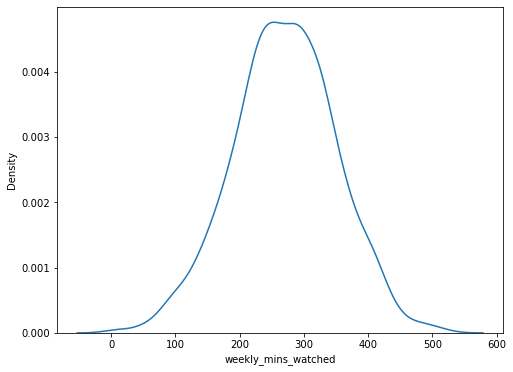

In [8]:
plt.figure(figsize=(8,6))
sns.kdeplot(x='weekly_mins_watched',data=data)

<AxesSubplot:xlabel='weekly_mins_watched', ylabel='Count'>

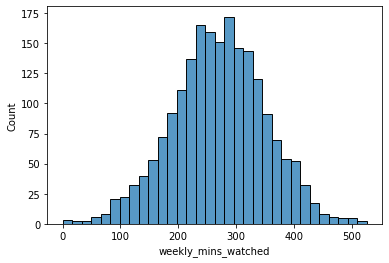

In [9]:
sns.histplot(x='weekly_mins_watched',data=data)

In [10]:
# data= 1,5,2,7,3,7,8,5000

- Outliers are a few data points that are significantlly different from the rest of the data.
- Any value which very much far from the mean value can be treated as an outlier.

In [11]:
data.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

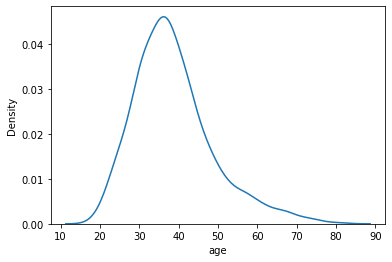

In [12]:
sns.kdeplot(x='age',data=data)

# Central Tendency

In [13]:
# Mean
# Median
# Mode

In [14]:
# min=1
# mean-50
# max=100

# How to check for the outliers

### 1- Quantile Method
- Any value less than 1st percentile value and greater than 99th percentile value is treated as an outlier

In [15]:
data.age.describe()

count    2000.00000
mean       38.69050
std        10.20641
min        18.00000
25%        32.00000
50%        37.00000
75%        44.00000
max        82.00000
Name: age, dtype: float64

In [23]:
data.age.quantile(0.01)

21.0

In [17]:
data.age.quantile(.99)

70.0

In [25]:
np.percentile(data.age,1)

21.0

In [26]:
np.percentile(data.age,99)

70.0

### 2- IQR Method

- Boxplot follows the IQR method to check for the outliers

### Checking outliers on age column

<AxesSubplot:ylabel='age'>

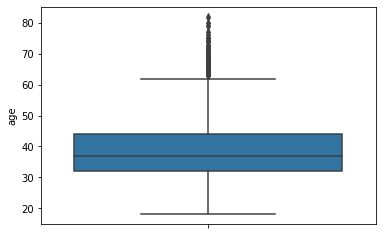

In [28]:
sns.boxplot(y='age',data=data)

In [32]:
q1=data.age.quantile(0.25)
q3=data.age.quantile(0.75)
iqr=q3-q1

print(q1,q3,iqr,sep='\n')
print(data.age.quantile(.50))

32.0
44.0
12.0
37.0


In [31]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr

print(lower,upper,sep='\n')

14.0
62.0


In [35]:
37-14,62-37

(23, 25)

# Treatment of the outliers

- 1- As per the quantile method we cap the values between 1st and 99th percentile values.
- 2- As per the IQR method we cap the values between lower bound and upper bound

In [36]:
# 18,20,17  21
# 21 21 21 21

# 80,75,72,68  70
# 70 70 70 70  70

- We are using IQR method to cap the values in age column.

In [40]:
q1=data.age.quantile(0.25)
q3=data.age.quantile(0.75)
iqr=q3-q1

# print(q1,q3,iqr,sep='\n')

lower=q1-1.5*iqr
upper=q3+1.5*iqr

print(lower,upper,sep='\n')

14.0
62.0


# To cap the values we can use 
- 1- np.where()
- 2- clip()

In [42]:
data.age=np.where(data.age<lower,lower,np.where(data.age>upper,upper,data.age))

- np.where(condition,x,y)
- If the condition is True x is the result.
- If the condition is False y is the result

In [45]:
data.age.max()

62.0

<AxesSubplot:ylabel='age'>

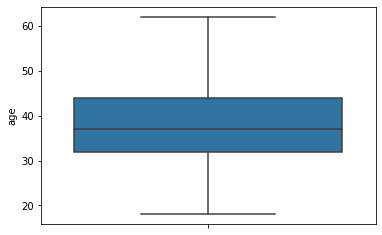

In [46]:
sns.boxplot(y='age',data=data)

In [47]:
data.age.describe()

count    2000.000000
mean       38.478500
std         9.601231
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        62.000000
Name: age, dtype: float64

In [48]:
arr=np.random.randint(10,100,9).reshape(3,3)

In [49]:
arr

array([[44, 24, 30],
       [36, 83, 72],
       [99, 54, 56]])

In [54]:
arr_2=np.where(arr<40,0,arr)
arr_2=np.where(arr_2>70,1,arr_2)

In [55]:
arr_2

array([[44,  0,  0],
       [ 0,  1,  1],
       [ 1, 54, 56]])

In [56]:
arr_2=np.where(arr<40,0,np.where(arr_2>70,1,arr_2))

In [57]:
arr_2

array([[44,  0,  0],
       [ 0,  1,  1],
       [ 1, 54, 56]])

# Splitting the data into numeric and object 

In [59]:
num_data=data.select_dtypes('number')
num_data.head()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,36.0,62,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,39.0,149,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,62.0,126,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,24.0,131,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,40.0,191,243.00,10.9,27.54,83,7,3.0,1,0.0


In [61]:
obj_data=data.select_dtypes('object')
obj_data.head()

,phone_no,gender,multi_screen,mail_subscribed
0,409-8743,Female,no,no
1,340-5930,Female,no,no
2,372-3750,Female,no,no
3,331-4902,Female,no,yes
4,351-8398,Female,no,no


# Treatment of the outliers in the num_data

In [63]:
cols=list(num_data.columns)
cols

['year',
 'customer_id',
 'age',
 'no_of_days_subscribed',
 'weekly_mins_watched',
 'minimum_daily_mins',
 'maximum_daily_mins',
 'weekly_max_night_mins',
 'videos_watched',
 'maximum_days_inactive',
 'customer_support_calls',
 'churn']

In [97]:
def out_cap(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    
    iqr=q3-q1


    lower=q1-1.5*iqr
    upper=q3+1.5*iqr

    return data.clip(lower=lower,upper=upper)
    

In [98]:
for i in cols:
    if i!='churn':
        num_data[i]=out_cap(num_data[i])

In [99]:
for i in cols:
    print(i)

year
customer_id
age
no_of_days_subscribed
weekly_mins_watched
minimum_daily_mins
maximum_daily_mins
weekly_max_night_mins
videos_watched
maximum_days_inactive
customer_support_calls
churn


In [100]:
# data['year']

<AxesSubplot:ylabel='weekly_mins_watched'>

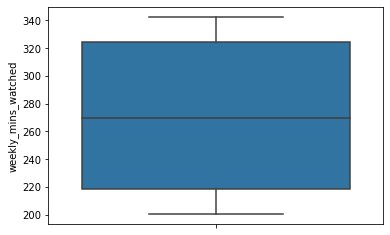

In [101]:
sns.boxplot(y='weekly_mins_watched',data=num_data)

<AxesSubplot:ylabel='videos_watched'>

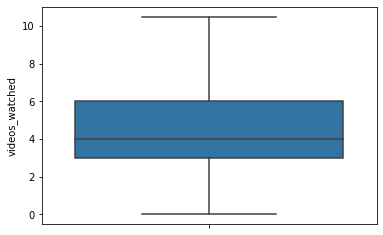

In [102]:
sns.boxplot(y='videos_watched',data=num_data)

<AxesSubplot:ylabel='videos_watched'>

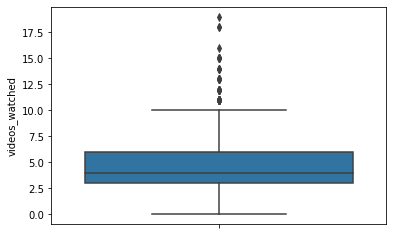

In [103]:
sns.boxplot(y='videos_watched',data=data)

<AxesSubplot:ylabel='maximum_days_inactive'>

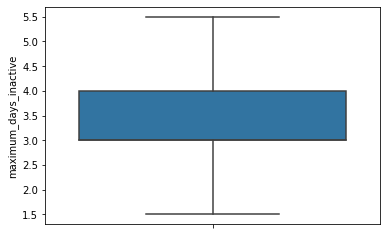

In [104]:
sns.boxplot(y='maximum_days_inactive',data=num_data)

<AxesSubplot:ylabel='weekly_max_night_mins'>

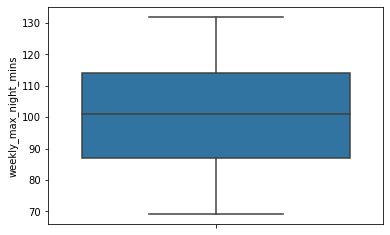

In [105]:
sns.boxplot(y='weekly_max_night_mins',data=num_data)

In [106]:
def out_cap(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    
    iqr=q3-q1


    lower=q1-1.5*iqr
    upper=q3+1.5*iqr

#     return data.clip(lower=lower,upper=upper)
    print(lower,upper,sep='\n')
    

In [107]:
out_cap(data.age)

14.0
62.0


In [108]:
out_cap(data.no_of_days_subscribed)

-8.0
208.0


In [109]:
out_cap(data.videos_watched)

-1.5
10.5


# Univariate Analysis

# Checking whether a column is a discrete column or categorical column

In [111]:
data.nunique()

year                         1
customer_id               1999
phone_no                  2000
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

# Unique value analysis for categorical columns

In [114]:
data.gender.value_counts(dropna=False)*100/len(data)

Male      52.65
Female    46.15
NaN        1.20
Name: gender, dtype: float64

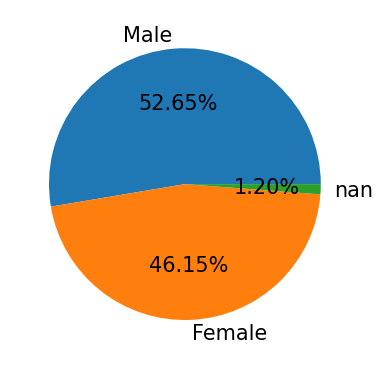

In [127]:
plt.figure(figsize=(4,3),dpi=150)
plt.pie(data.gender.value_counts(dropna=False),labels=data.gender.value_counts(dropna=False).index,autopct='%.2f%%')
plt.show()

In [125]:
data.gender.value_counts(dropna=False).index

Index(['Male', 'Female', nan], dtype='object')

In [129]:
data.gender.value_counts(dropna=False)

Male      1053
Female     923
NaN         24
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

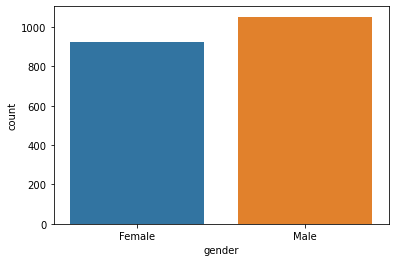

In [130]:
sns.countplot(x='gender',data=data)

In [131]:
data.year.value_counts()

2015    2000
Name: year, dtype: int64

In [133]:
data.phone_no.value_counts()

362-9411    1
417-7888    1
361-1404    1
381-1026    1
334-5029    1
           ..
408-2712    1
366-6248    1
327-5817    1
413-9055    1
338-7683    1
Name: phone_no, Length: 2000, dtype: int64

In [138]:
# data.phone_no.std()

In [141]:
data.phone_no.describe()

count         2000
unique        2000
top       362-9411
freq             1
Name: phone_no, dtype: object

In [142]:
# 100- rows
# 2- unique (a,b)
# 50-a
# 50-b

In [143]:
# gender- 'male'
# gnder-'female'

In [144]:
# male female
# 90 10

In [146]:
data.multi_screen.value_counts(dropna=False)*100/len(data)

no     90.1
yes     9.9
Name: multi_screen, dtype: float64

<AxesSubplot:xlabel='multi_screen', ylabel='count'>

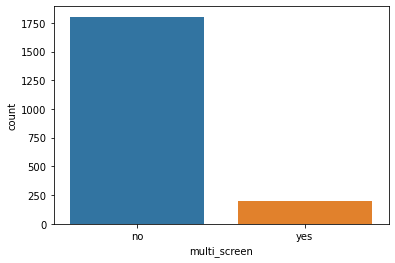

In [147]:
sns.countplot(x='multi_screen',data=data)

# Bivariate Analysis

# Coorelation

In [148]:
data.corr()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,NaN,1.000000,0.023830,-0.011457,-0.013830,0.033733,-0.013834,0.009713,0.063967,0.045145,-0.036009,-0.056777
age,NaN,0.023830,1.000000,0.038822,0.016316,-0.000676,0.016328,0.016645,0.013076,0.006690,0.000618,0.011631
no_of_days_subscribed,NaN,-0.011457,0.038822,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.017961,0.013419,0.002528
weekly_mins_watched,NaN,-0.013830,0.016316,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.013635,-0.036848,0.165871
minimum_daily_mins,NaN,0.033733,-0.000676,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.932155,-0.003943,0.067668
maximum_daily_mins,NaN,-0.013834,0.016328,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.013634,-0.036854,0.165870
weekly_max_night_mins,NaN,0.009713,0.016645,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026676,-0.003965,0.006211
videos_watched,NaN,0.063967,0.013076,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033829,-0.001201,-0.020780
maximum_days_inactive,NaN,0.045145,0.006690,0.017961,-0.013635,0.932155,-0.013634,0.026676,0.033829,1.000000,-0.001572,0.048040


<AxesSubplot:>

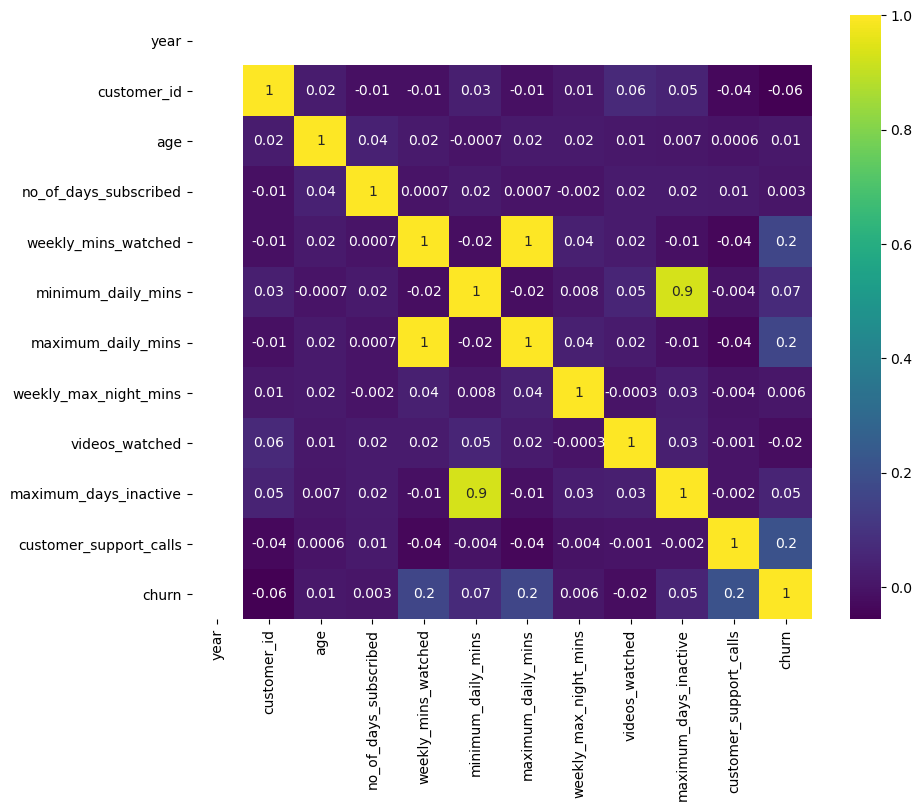

In [155]:
plt.figure(figsize=(10,8),dpi=100)

sns.heatmap(data.corr(),fmt='.1g',cmap='viridis',annot=True)

In [156]:
# demand and price

In [157]:
# price and demand

In [158]:
data.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [160]:
data[['maximum_daily_mins','weekly_mins_watched']].corr()

,maximum_daily_mins,weekly_mins_watched
maximum_daily_mins,1.0,1.0
weekly_mins_watched,1.0,1.0


<AxesSubplot:>

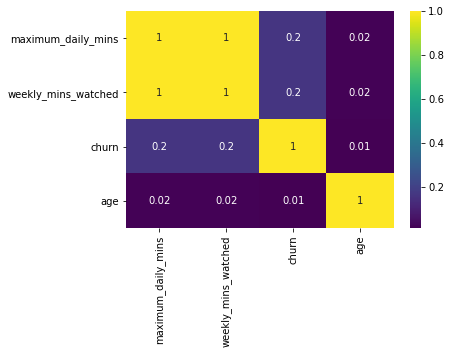

In [164]:
sns.heatmap(data[['maximum_daily_mins','weekly_mins_watched','churn','age']].corr(),annot=True,cmap='viridis',fmt='.1g')

In [165]:
# sns.scatterplot(x='age',hue='')

In [166]:
data=sns.load_dataset('titanic')

In [167]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='age', ylabel='fare'>

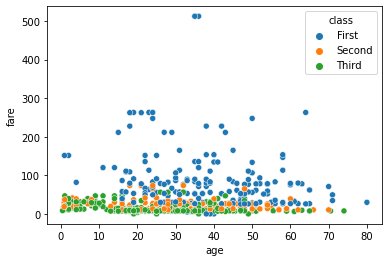

In [174]:
sns.scatterplot(x='age',y='fare',hue='class',data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

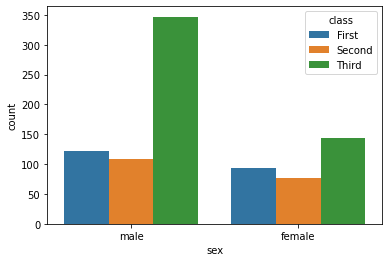

In [181]:
sns.countplot(x='sex',hue='class',data=data)

In [184]:
data.groupby(['sex','class']).age.mean()

sex     class 
female  First     34.611765
        Second    28.722973
        Third     21.750000
male    First     41.281386
        Second    30.740707
        Third     26.507589
Name: age, dtype: float64